In [1]:
# Importing all necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import os
import math
import scipy
import pprint

# import scikit-learn as sk

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetching the dataset (csv file).

df = pd.read_csv('E:\\Govind_Work_Folder\\Career247_(Data_Science_Course)\\03. Data Science Course (Career247)\\Module 4 (Machine Learning)\\DecisionTreesImplementaion\\DecisionTreesFoundations\\breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Step 1: EDA (Exploratory Data Analysis)

In [3]:
# 1. Check basic informations.

print("Shape:", df.shape)
print("*" * 80)

print("Columns:", df.columns)
print("*" * 80)

print(df.info())
print("*" * 80)

print(df.describe())
print("*" * 80)

Shape: (569, 33)
********************************************************************************
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Cou

In [4]:
# 2. Check for missing values.

print("Null Value Check:", df.isnull().sum())

Null Value Check: id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

In [5]:
# 3. Correlation matrix.

print("Correlation Matrix:")
# print(df.corr())
print(df.corr(numeric_only=True))

Correlation Matrix:
                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se           

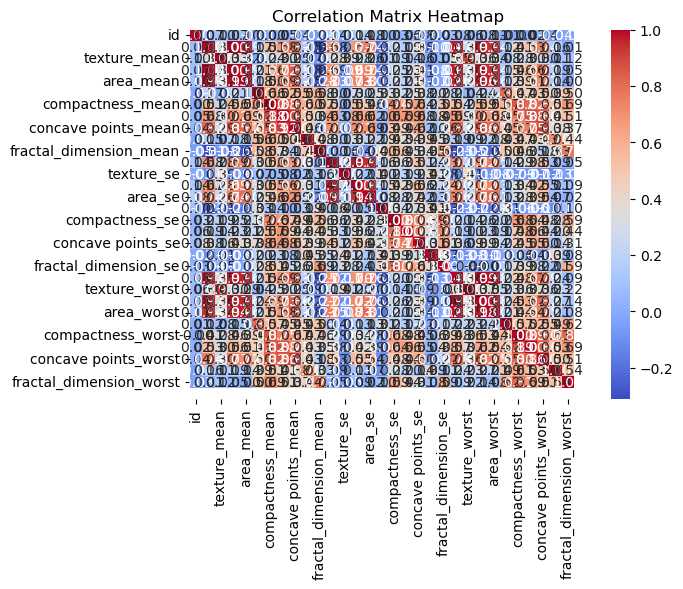

In [6]:
# 4. Visualize the data.

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
# Sample data for line plot.

df10 = pd.DataFrame({
    "x-axis": [1, 2, 3, 4, 5],
    "y-axis": [10, 15, 13, 17, 20]
})

# Create line plot

fig = px.line(df10, x="x-axis", y="y-axis", title="Simple Line Plot (Using Plotly Express)")
fig.show()

In [8]:
# Sample data for scatter plot with categories.

df20 = pd.DataFrame({
    "x": [1, 2, 3, 4, 5, 6],
    "y": [10, 14, 12, 18, 22, 19],
    "category": ["A", "B", "A", "B", "A", "B"]
})

# Create scatter plot

fig = px.scatter(df20, x="x", y="y", color="category", size="y", title="Scatter Plot with Categories (Using Plotly Express)")
fig.show()

In [9]:
# Deleting columns:

print("Dropping the redundant\n")
df.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.shape

Dropping the redundant



(569, 31)

In [10]:
print("Unique value of Diagnosis column in the output label: \n")
print(df['diagnosis'].unique())

Unique value of Diagnosis column in the output label: 

['M' 'B']


In [11]:
# Output label / Target variable / Y-label : data distribution 
# pie-plot : proportion of M v/s B

px.pie(df, 
       'diagnosis',
       color = 'diagnosis',
       color_discrete_sequence = ['#007500','#5CFF5C'],
       title = "Data Distribution")

# Inferences :
# dataset is imbalanced (M : B = 63:37).
# there are more cases of benign tumors than malignant tumors.
# for imbalanced datasets, accuracy can be a misleading metric.
# for example, if 90% of the cases are benign, the model will always predict "benign".
# in such cases, we need "Balanced accuracy".

In [12]:
# visually compare the distribution of each feature.
# for malignant tumours versus bening.
# for a given feature, do its values tend to be different for malignant vs benign cases.

for column in df.drop("diagnosis", axis = 1).columns[:5]:

    # for loop auto iterates through the first five feature columns in the dataframe.

    fig = px.box(data_frame = df,
                 x = 'diagnosis',
                 color = 'diagnosis',
                 y = column,
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')
    fig.show()

In [13]:
for column in df.drop("diagnosis",axis=1).columns[5:10]:
    
    # for loop auto iterates through the first five feature columns in the dataframe
    fig = px.scatter(data_frame =df ,
                 x=column,
                 color = 'diagnosis',
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')
    fig.show()

##### Step 2: Creating corelation with the targer variable.

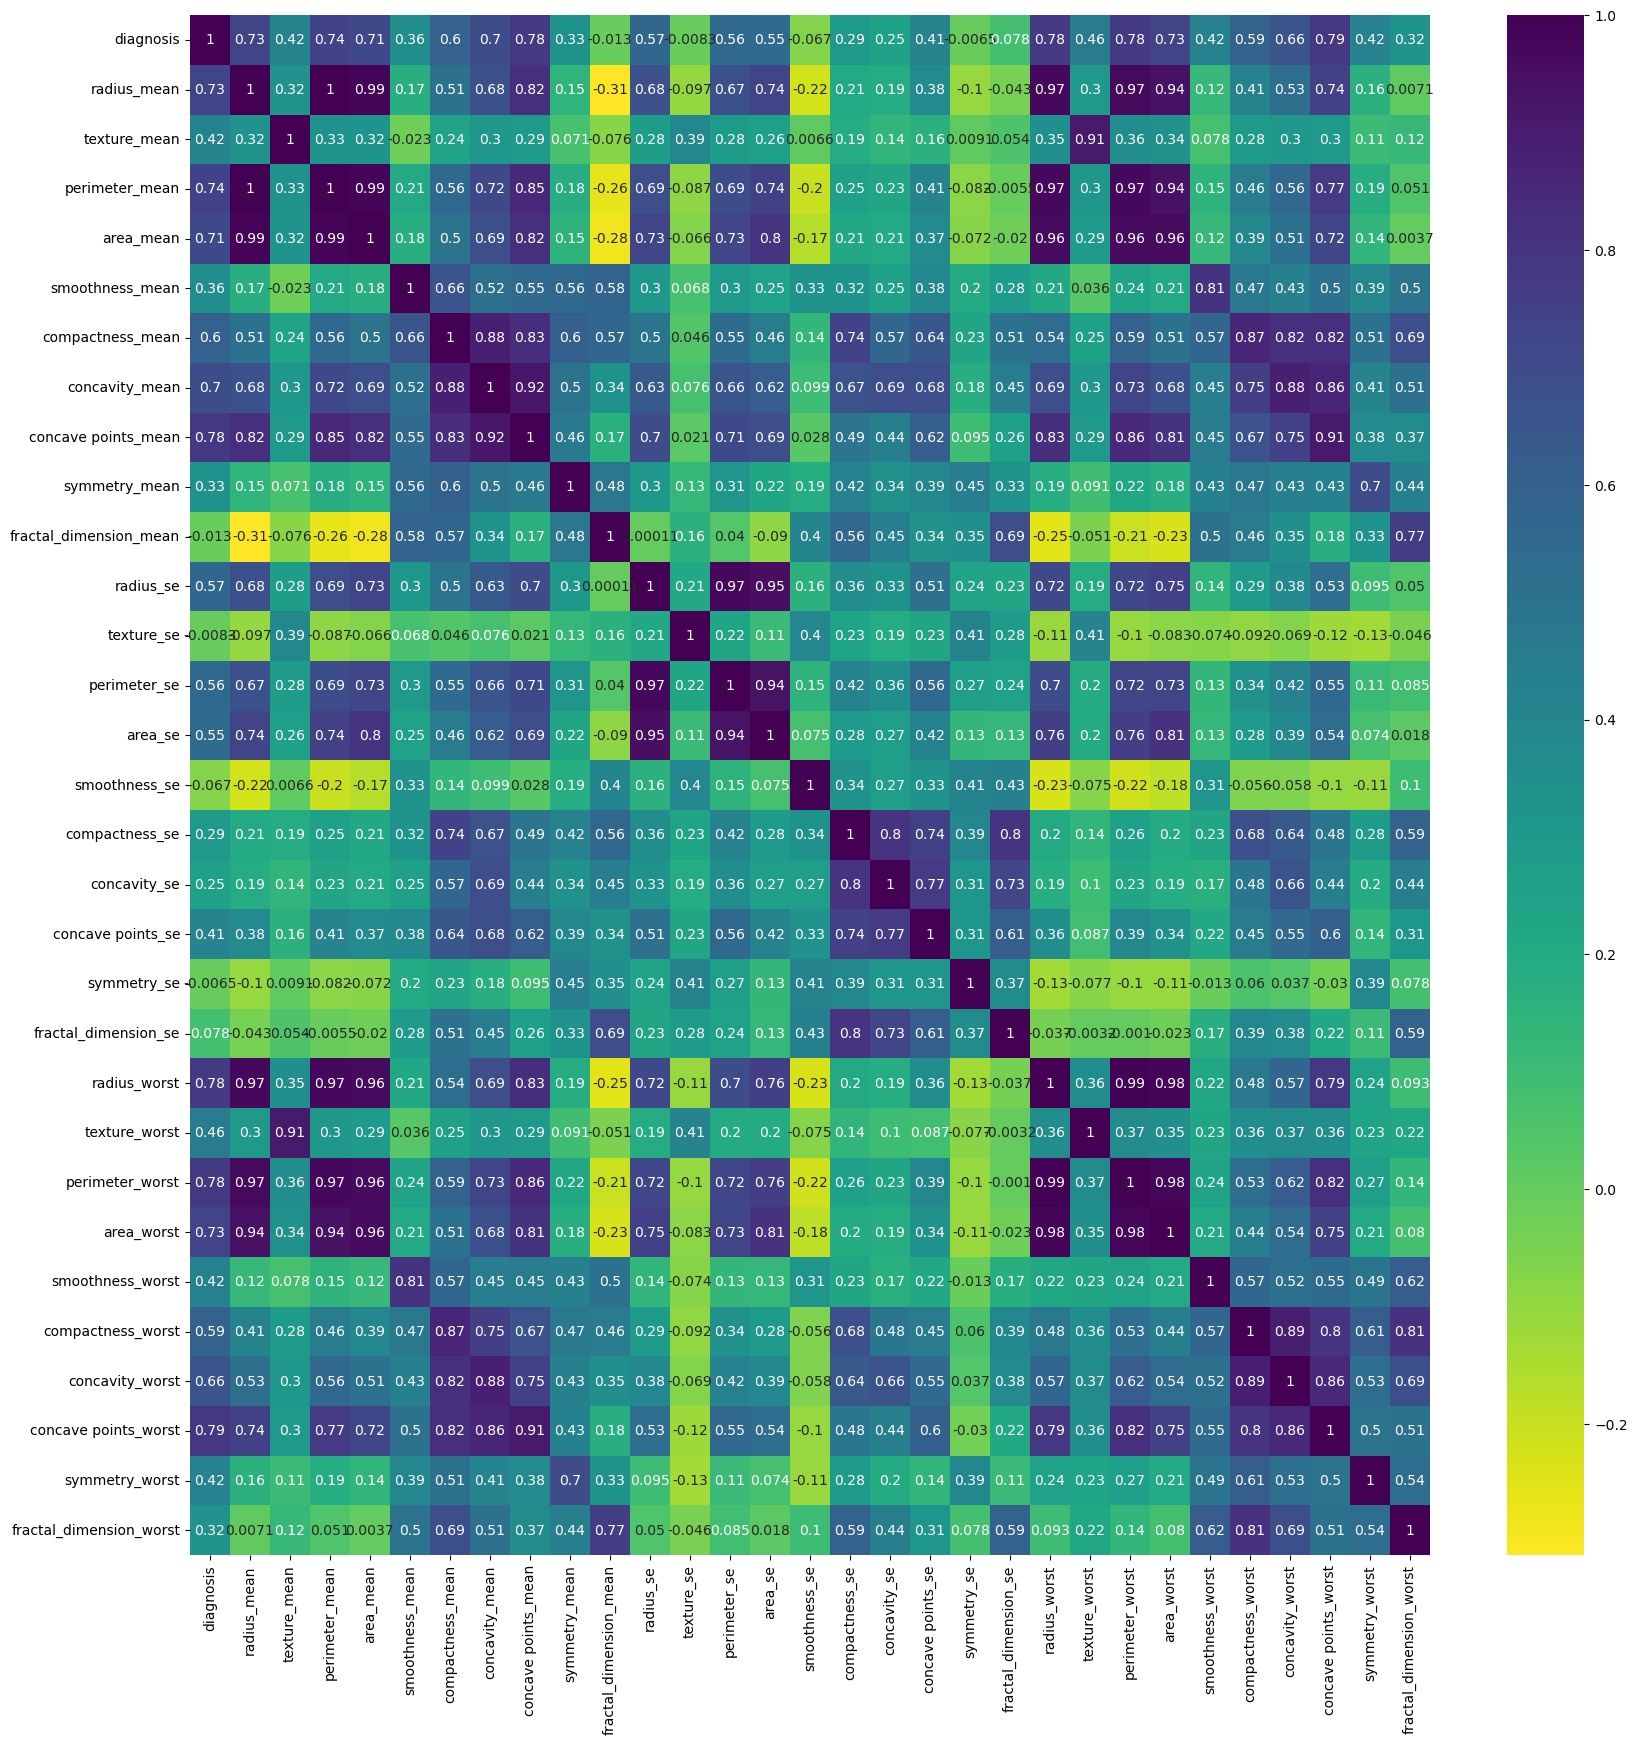

In [14]:
# diagnosis : M or B :categorical
# encode : 1 or 0 :categorical

# this line converts the categorical feature into numerical
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

# setting M = 1  then B = 0

# take the correlation
corr = df.corr()
plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap = 'viridis_r' , annot = True)

plt.show()
# correlation goes between : -1 to 1

In [15]:
# We can also use it for corelation without chart.
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


##### Step 3: Feature Selection (Feature Engineering)

In [ ]:
# We should now choose which features are good enough predictors to be used to train the model 
# get the absoulte correlation 

# select better correlated features
# this is the filtering step
# it creates a new list of relevant features
cor_target = abs(corr['diagnosis'])

# 0.25 is user defined. It is the hyper-parameter value
relevant_features = cor_target[cor_target > 0.25]

# collect the names of features
# list comprehension

names = [index for index,value in relevant_features.items()]

# Drop the target variable from the results
names.remove("diagnosis")

pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


##### Step 4: Assign Training Data and Training Labels

In [ ]:
X = df[names].values

# this line creates target vector or a target label 
# df['diagnosis'].values : (569, 1)
y = df['diagnosis'].values.reshape(-1, 1)

print("Input features are:", X.shape,"Output Label shape is: ", y.shape)

Input features are: (569, 25) Output Label shape is:  (569, 1)


In [18]:
# we need to scale
# Standardize / Z-score normalization
# apply on X

import numpy as np

def scale(X):
    '''
    Parameters : numpy.ndarray) 
    Returns : numpy.ndarray
    '''

    # Compute the mean and standard deviation
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize this data
    X = (X - mean) / std

    return X

X = scale(X)

##### Step 5: Model Implementation

In [20]:
# We will start with all the examples at the Root Nodes
# Then we will calculate the Information Gain for each feature / Gini Index for each feature
# then we will pick the feature with the highest Information Gain / Gini Index
# then we will split the data according to selected feature
# we will repeat this process until we reach the stopping criteria

# Node Class
class Node:
    '''
    A class representing a Node in a Decision Tree.
    '''
    def __init__(self, feature=None, threshold=None, left=None, right=None,gain = None, value=None):
        '''
        Initializes a Node. 

        Parameters:
        - feature: The index of the feature to split on.
        - threshold: The threshold value for the split. Defaults to None
        - left: The left child Node. Defaults to None
        - right: The right child Node. Defaults to None
        - value: The class label if it's a leaf node.
        '''
      
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

'''
Explanation : 
self.threshold = threshold
self.feature = feature 
The above two are used by Decision Nodes.
They store the question being asked at this node .
For example , "Is the radius_mean < 15.5 ? "

self.left = left and self.right = right
Used by decision nodes to point to the left and right child nodes.  
They are also called pointer nodes.
       
self.value = value
used  by leaf nodes to store the class label.
If a node is a final endpoint . it does not ask any questions
it holds predicted class label or prediciton for each branch
self.value will be 0(Benign) or 1(Malignant) for leaf nodes.

self.gain = gain
Used by Decision Nodes to store the Information Gain or Gini Index of the split.
'''

'\nExplanation : \nself.threshold = threshold\nself.feature = feature \nThe above two are used by Decision Nodes.\nThey store the question being asked at this node .\nFor example , "Is the radius_mean < 15.5 ? "\n\nself.left = left and self.right = right\nUsed by decision nodes to point to the left and right child nodes.  \nThey are also called pointer nodes.\n       \nself.value = value\nused  by leaf nodes to store the class label.\nIf a node is a final endpoint . it does not ask any questions\nit holds predicted class label or prediciton for each branch\nself.value will be 0(Benign) or 1(Malignant) for leaf nodes.\n\nself.gain = gain\nUsed by Decision Nodes to store the Information Gain or Gini Index of the split.\n'

##### Step 6: Building the Decision Trees